In [1]:
import ROOT
from itertools import product
from array import array
from math import pow, sqrt

Welcome to JupyROOT 6.28/04


In [2]:
f = ROOT.TFile.Open("results/2017/ROOT/muon/fakerate.root")
h = f.Get("fakerate")
#ptcorr_bins = [10., 15., 20., 25., 35., 50., 70., 100.]   # 20, 35
#abseta_bins = [0., 0.8, 1.579, 2.5]

ptCorr_bins = [10., 15., 20., 30., 50., 100.]        # 30
abseta_bins = [0., 0.9, 1.6, 2.4]

In [3]:
for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta, ptCorr)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

0.0 10.0 0.3570149050365009 0.03416051308462289 9.568371684966582
0.0 15.0 0.1906919074813202 0.023644160088940946 12.399141841536764
0.0 20.0 0.1201092239940484 0.012368296398994703 10.29754084466283
0.0 30.0 0.0801718505019557 0.01237158312067239 15.431330377450376
0.0 50.0 0.1021757565645635 0.028264694780816432 27.662819176637417
0.9 10.0 0.405899799245278 0.03905196237342737 9.621084426757493
0.9 15.0 0.1996020558522593 0.019987216919759375 10.013532593348357
0.9 20.0 0.1550650529170388 0.025483613615259876 16.43414369380433
0.9 30.0 0.1053731875014124 0.01802340390587674 17.10435484893646
0.9 50.0 0.1154279780561766 0.04150268948234773 35.95548512696736
1.6 10.0 0.4430066544174161 0.04200252246243911 9.481239625548127
1.6 15.0 0.2340025305246858 0.07647351571674751 32.680636207342225
1.6 20.0 0.1917448276292422 0.03410856352894577 17.788518183602893
1.6 30.0 0.1325286634689427 0.017239336675490876 13.0080061356167
1.6 50.0 0.18110269641388 0.04663536629643282 25.750785173212147


In [4]:
# prepare canvas and legend
c = ROOT.TCanvas("c", "", 1600, 1800)
pad_up = ROOT.TPad("pad_up", "", 0, 0.25, 1, 1)
pad_up.SetBottomMargin(0.02)
pad_down = ROOT.TPad("pad_down", "", 0, 0, 1, 0.25)
pad_down.SetTopMargin(0.08)
pad_down.SetBottomMargin(0.3)
pad_down.SetGrid()
legend = ROOT.TLegend(0.65, 0.50, 0.9, 0.87)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

info = ROOT.TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = ROOT.TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = ROOT.TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)

In [9]:
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

ratios = {}
ratios['eta1'] = projections['eta1'].Clone("ratio1")
ratios['eta2'] = projections['eta2'].Clone("ratio2")
ratios['eta3'] = projections['eta3'].Clone("ratio3")

for bin in range(1, ratios['eta1'].GetNbinsX()+1):
    content = ratios['eta1'].GetBinError(bin)/ratios['eta1'].GetBinContent(bin)
    ratios['eta1'].SetBinContent(bin, content)
    ratios['eta1'].SetBinError(bin, 0)
    ratios['eta1'].SetMarkerColor(2)
for bin in range(1, ratios['eta2'].GetNbinsX()+1):
    content = ratios['eta2'].GetBinError(bin)/ratios['eta2'].GetBinContent(bin)
    ratios['eta2'].SetBinContent(bin, content)
    ratios['eta2'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(3)
for bin in range(1, ratios['eta3'].GetNbinsX()+1):
    content = ratios['eta3'].GetBinError(bin)/ratios['eta3'].GetBinContent(bin)
    ratios['eta3'].SetBinContent(bin, content)
    ratios['eta3'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(4)

for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle("fake rate (#mu)")
    
for hist in ratios.values():
    hist.SetStats(0)
    hist.SetTitle("")
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetXaxis().SetTitleSize(0.1)
    hist.GetXaxis().SetTitleOffset(0.8)
    hist.GetXaxis().SetLabelSize(0.08)
    hist.GetYaxis().SetRangeUser(0., 0.5)
    hist.GetYaxis().SetTitle("#Delta fr/fr")
    hist.GetYaxis().CenterTitle()
    hist.GetYaxis().SetTitleSize(0.1)
    hist.GetYaxis().SetTitleOffset(0.4)
    hist.GetYaxis().SetLabelSize(0.08)
    hist.SetMarkerStyle(8)
    hist.SetMarkerSize(0.7)

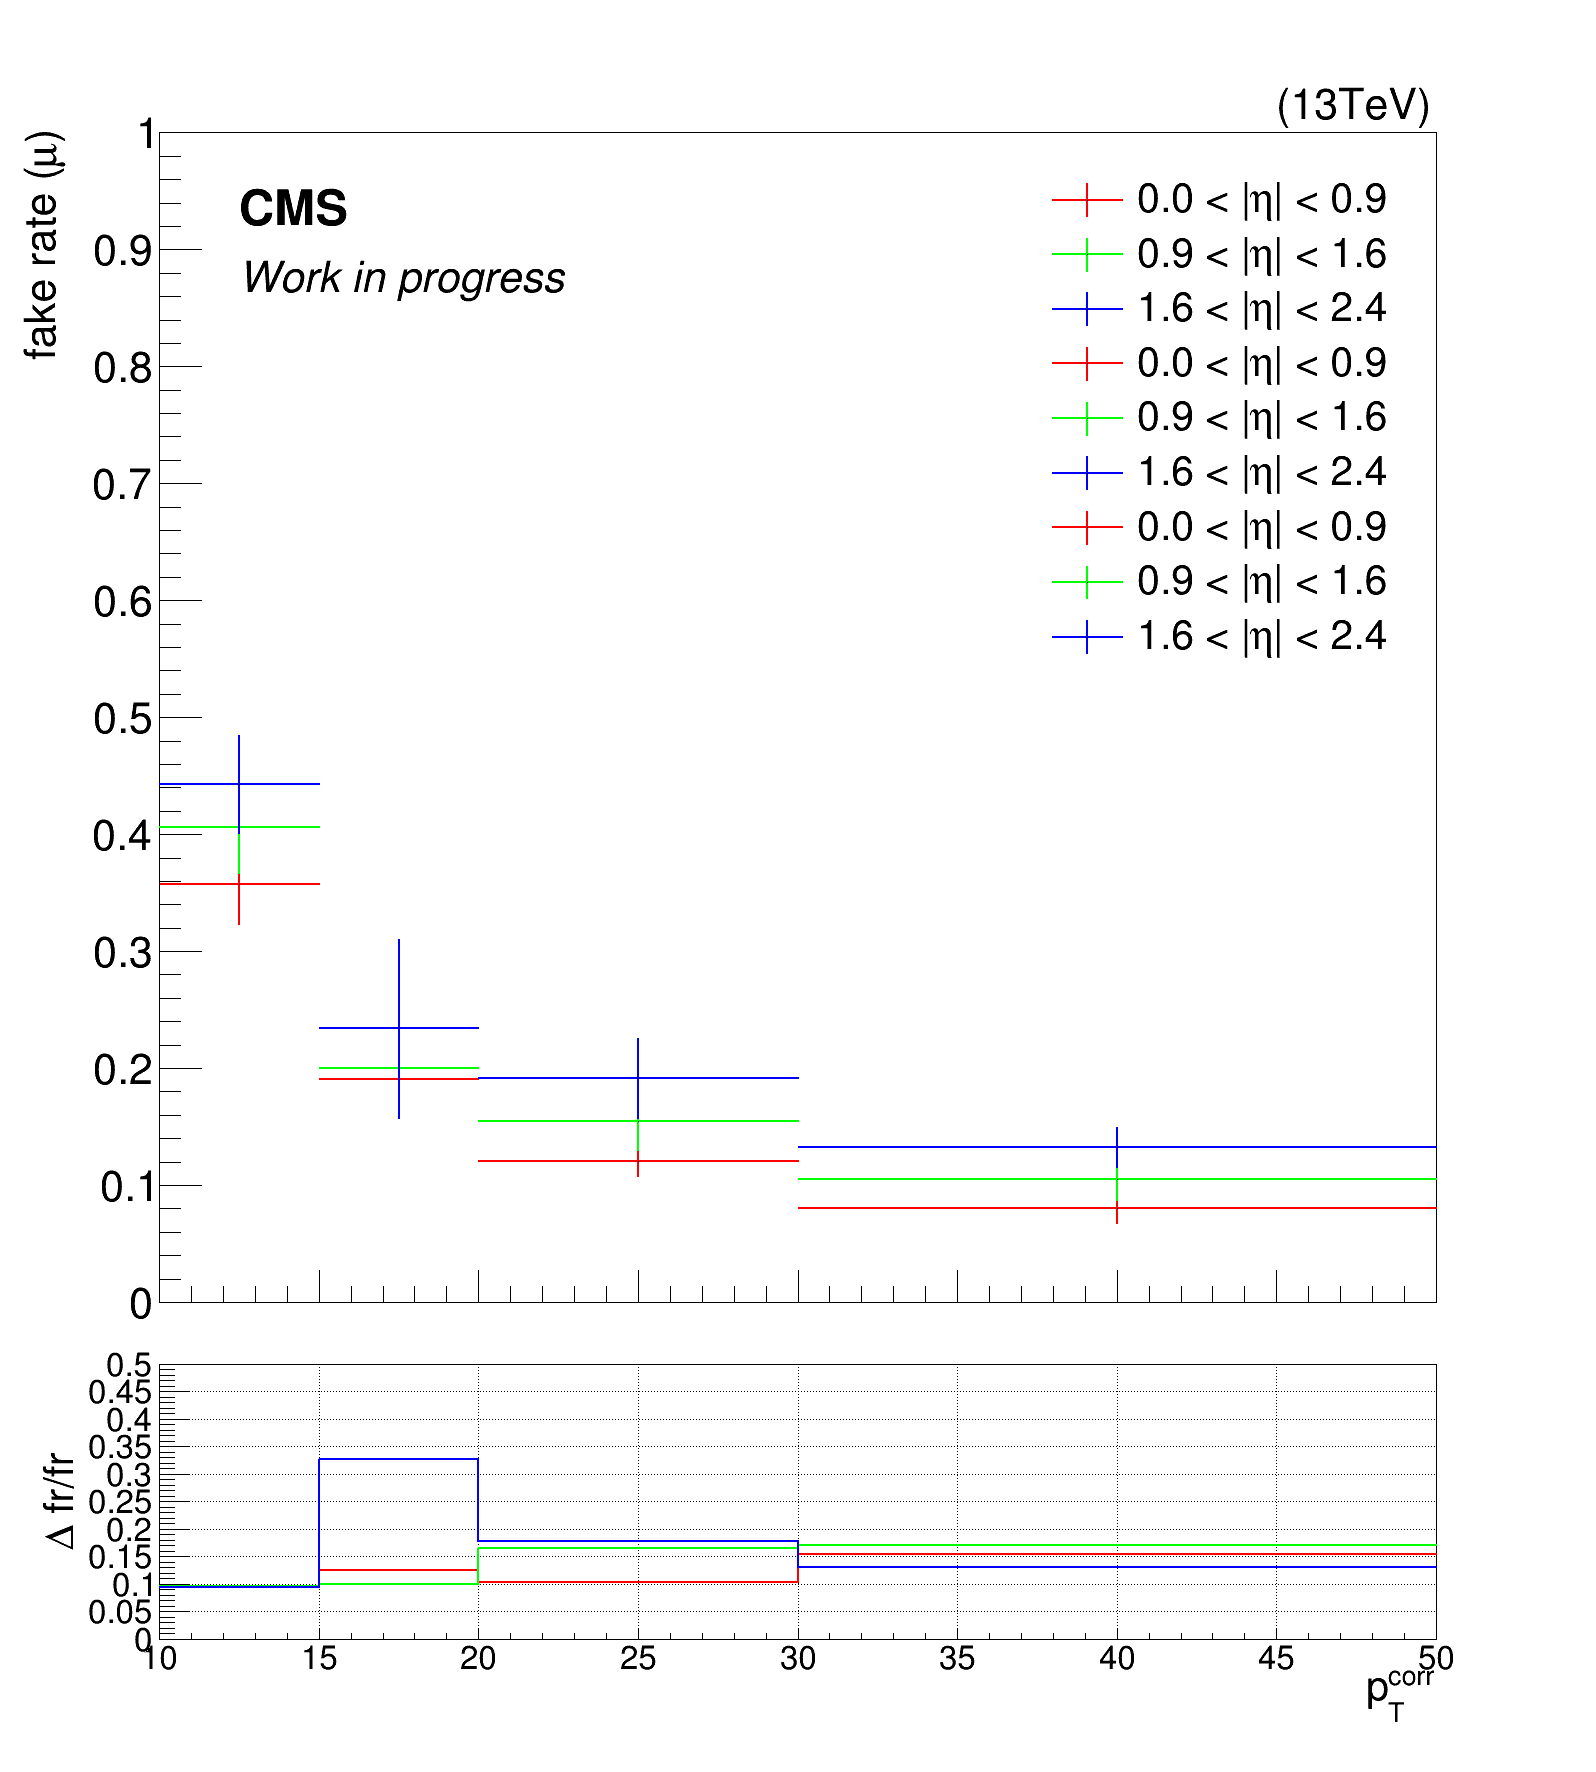

In [10]:
pad_up.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")
info.DrawLatexNDC(0.80, 0.91, "(13TeV)")
logo.DrawLatexNDC(0.15, 0.83, "CMS")
extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
pad_down.cd()
#ratios["eta1"].Draw("L")
ratios["eta1"].Draw()
ratios["eta2"].Draw("same")
ratios["eta3"].Draw("same")
c.cd()
pad_up.Draw()
pad_down.Draw()
c.Draw()